In [7]:
%matplotlib inline
import yt
from foggie.utils.yt_fields import *
from foggie.utils.foggie_utils import filter_particles


center = yt.YTArray([70482.02075547, 67798.01073692, 73316.14871677], 'kpc')

In [9]:
ds = yt.load('/Users/rsimons/Desktop/foggie/sims/halo_008508/nref11c_nref9f/DD2427/DD2427')
refine_box = ds.all_data()
filter_particles(refine_box, filter_particle_types = ['young_stars', 'old_stars', 'stars', 'dm'])


yt : [INFO     ] 2021-07-05 15:47:42,953 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2021-07-05 15:47:42,954 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-07-05 15:47:42,954 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-05 15:47:42,955 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-07-05 15:47:42,956 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-07-05 15:47:42,956 Parameters: current_redshift          = 0
yt : [INFO     ] 2021-07-05 15:47:42,956 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2021-07-05 15:47:42,957 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2021-07-05 15:47:42,957 Parameters: omega_radiation           = 0
yt : [INFO     ] 2021-07-05 15:47:42,957 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|█████████▉| 4261/4262 [00:00<00:00, 11472.99it/s]
yt : [INFO     ] 2021-07-05 15:47:43,57

filtering young_stars particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...


In [129]:
sp = ds.sphere(center, (3., 'kpc'))
sp = sp.cut_region(["(obj['temperature'] > {}) & (obj['temperature'] < {})".format(0, 1.e4)])
#bulk_vel = sp.quantities.bulk_velocity(use_gas=True,use_particles=True,particle_type='all').to('km/s')
#print (bulk_vel)
bulk_vel = sp.quantities.bulk_velocity(use_gas=False,use_particles=True,particle_type='stars').to('km/s')
#print (bulk_vel)
#bulk_vel = sp.quantities.bulk_velocity(use_gas=True,use_particles=False).to('km/s')
print (bulk_vel)

sp_new = ds.sphere(center, (40, 'kpc'))
sp_new.set_field_parameter('bulk_velocity', bulk_vel)
prj = yt.ProjectionPlot(ds, 2, 'radial_velocity', center = center, width = 30*kpc,
                        weight_field='density', data_source = sp_new)
#prj = yt.ProjectionPlot(ds, 2, 'density', center = center, width = 30*kpc,
#                        data_source = sp_new)

prj.set_unit('radial_velocity', 'km/s')
prj.set_zlim('radial_velocity', zmin = ds.arr(-100, 'km/s'), zmax = ds.arr(100, 'km/s'))
prj.save('~/Desktop/vrad.png')


[ -36.91099563 -145.78836037   57.05418757] km/s


yt : [INFO     ] 2021-07-05 17:05:52,401 Projection completed
yt : [INFO     ] 2021-07-05 17:05:52,402 xlim = 70467.020755 70497.020755
yt : [INFO     ] 2021-07-05 17:05:52,402 ylim = 67783.010737 67813.010737
yt : [INFO     ] 2021-07-05 17:05:52,403 xlim = 0.489746 0.489954
yt : [INFO     ] 2021-07-05 17:05:52,404 ylim = 0.471092 0.471300
yt : [INFO     ] 2021-07-05 17:05:52,404 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800
yt : [WARNING  ] 2021-07-05 17:05:52,434 Plot image for field ('gas', 'radial_velocity') has both positive and negative values. Min = -11332937.323362, Max = 16107092.468552.
yt : [WARNING  ] 2021-07-05 17:05:52,435 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2021-07-05 17:05:52,811 Saving plot /Users/rsimons/Desktop/vrad.png


['/Users/rsimons/Desktop/vrad.png']

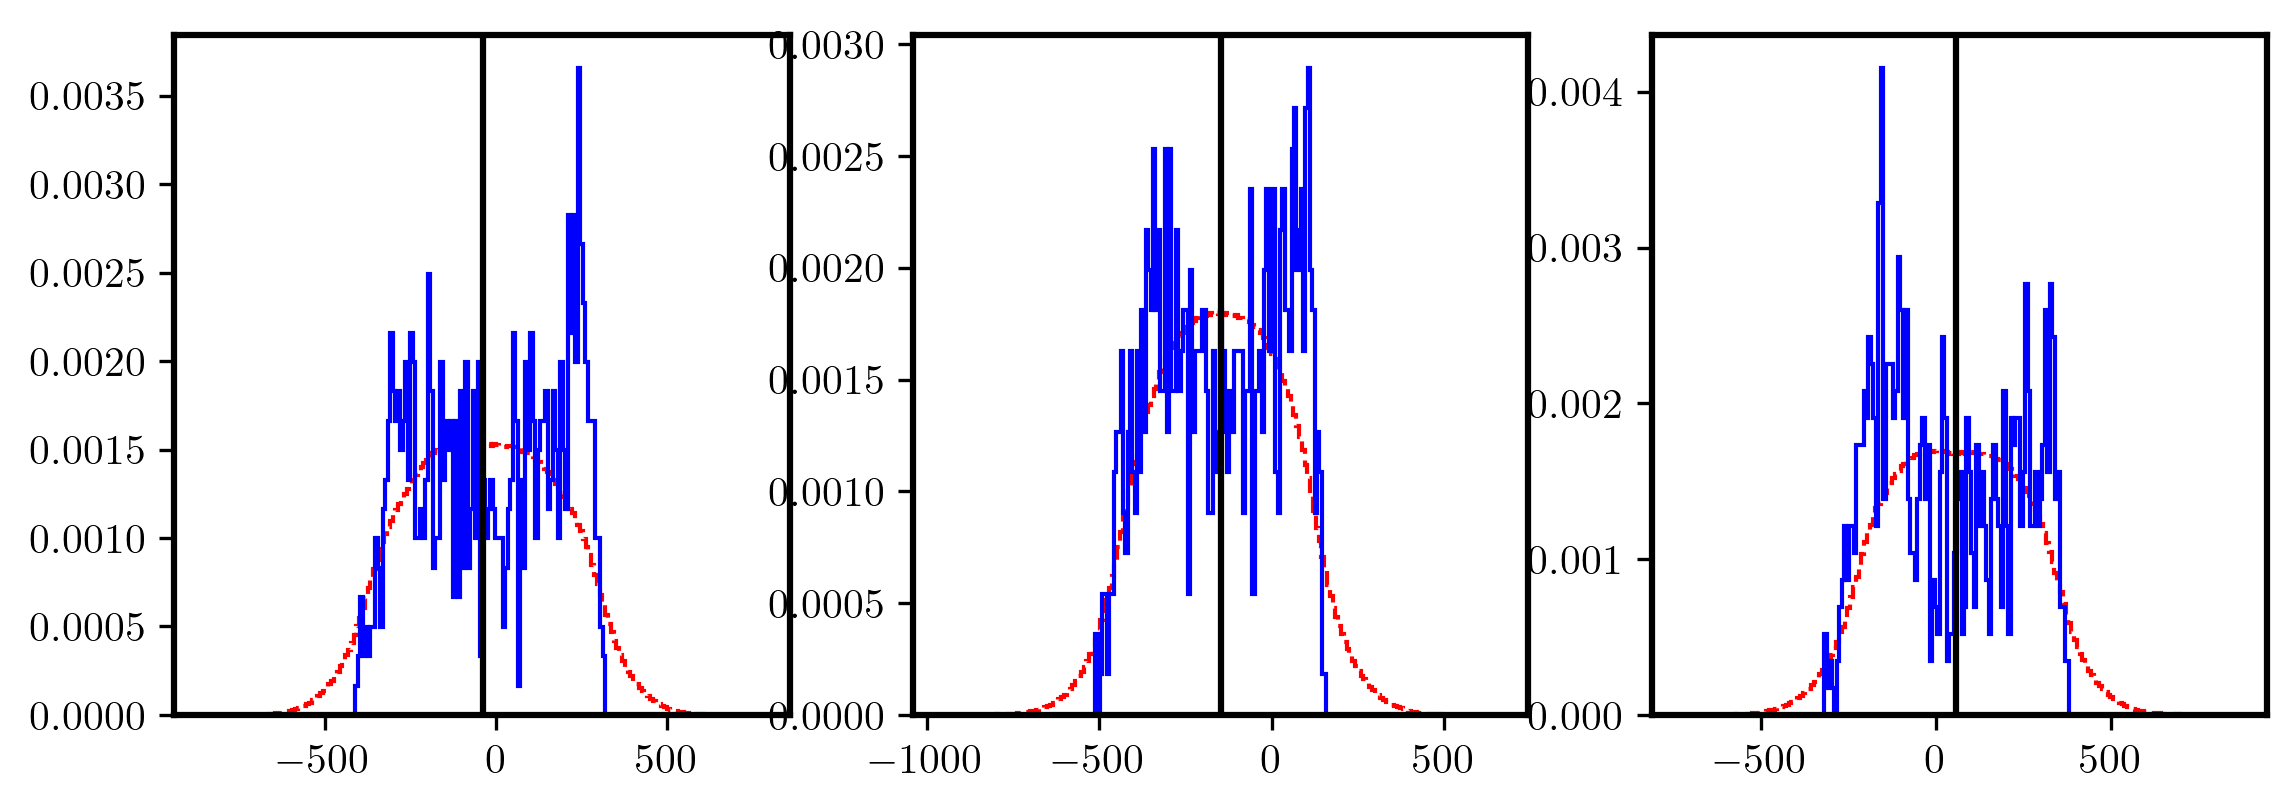

In [131]:
fig, axes = plt.subplots(1,3, figsize = (9, 3))


vx = sp['stars', 'particle_velocity_x']
vy = sp['stars', 'particle_velocity_y']
vz = sp['stars', 'particle_velocity_z']

gvx = sp['gas', 'velocity_x']
gvy = sp['gas', 'velocity_y']
gvz = sp['gas', 'velocity_z']


axes[0].hist(vx.to('km/s').value, color = 'red', linestyle = '--', histtype = 'step', density = True, bins = 200)
axes[1].hist(vy.to('km/s').value, color = 'red', linestyle = '--', histtype = 'step', density = True, bins = 200)
axes[2].hist(vz.to('km/s').value, color = 'red', linestyle = '--', histtype = 'step', density = True, bins = 200)
axes[0].hist(gvx.to('km/s').value, color = 'blue',histtype = 'step', bins = 100, density = True)
axes[1].hist(gvy.to('km/s').value, color = 'blue',histtype = 'step', bins = 100, density = True)
axes[2].hist(gvz.to('km/s').value, color = 'blue',histtype = 'step', bins = 100, density = True)

axes[0].axvline(x = bulk_vel[0], color = 'black')
axes[1].axvline(x = bulk_vel[1], color = 'black')
axes[2].axvline(x = bulk_vel[2], color = 'black')

fig.set_dpi(300)



In [132]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

In [ ]:
axes[0].hist

In [119]:
axes[0].hist?

In [ ]:
axes[0].hist